In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("USArrests.csv", index_col = 0)

In [3]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
data.shape

(50, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


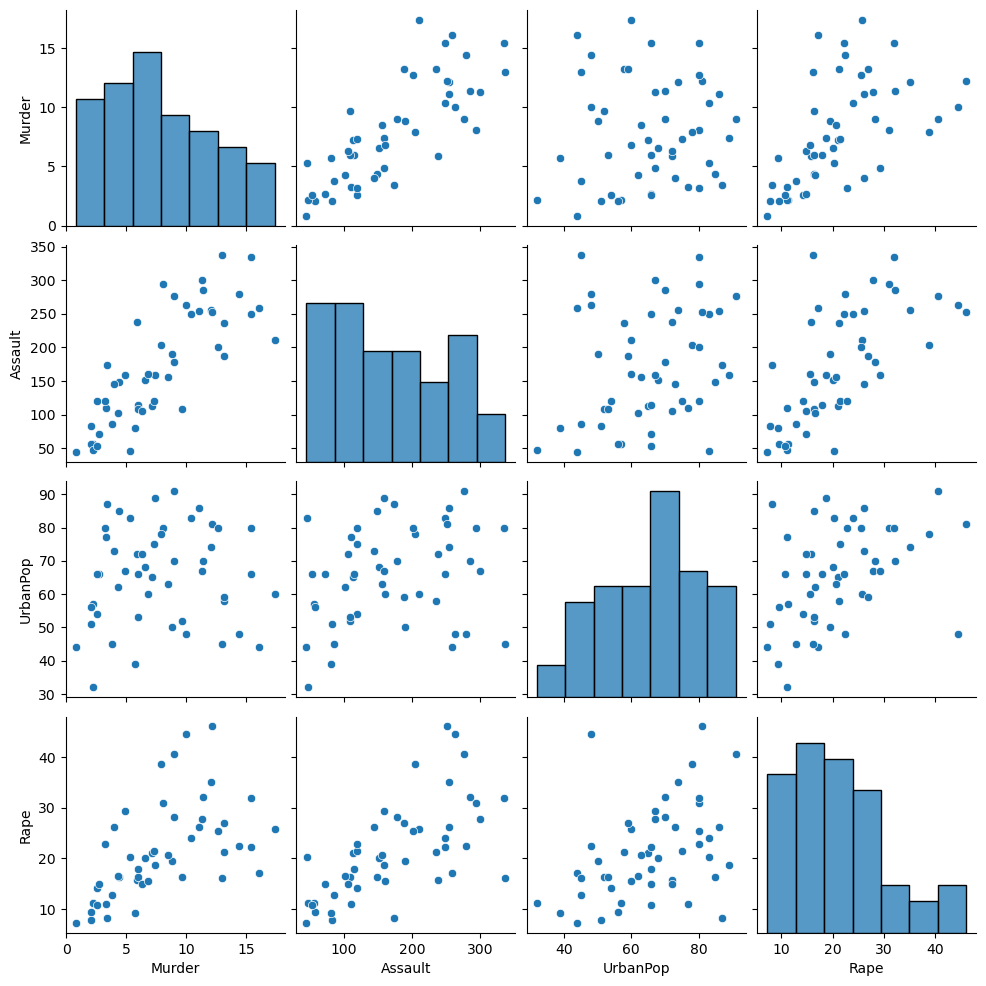

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
x = data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [12]:
kmeans.fit(x)

KMeans(n_clusters=6, random_state=42)

In [13]:
kmeans.inertia_

44.259807638112314

In [14]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6)
y_agg = agg.fit_predict(x)

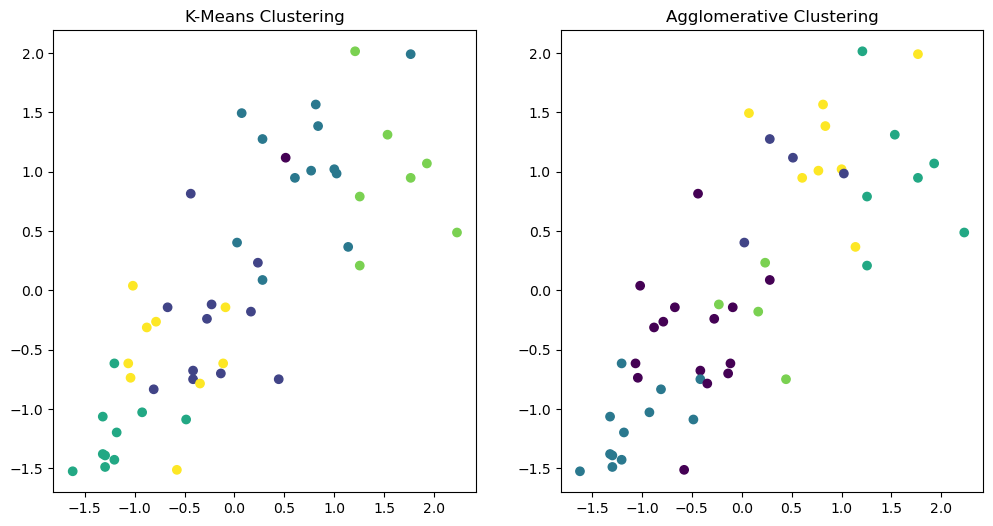

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.subplot(1,2,2)
plt.scatter(x[:, 0], x[:, 1], c=y_agg, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [16]:
x.shape

(50, 4)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [22]:
colors = data['UrbanPop']

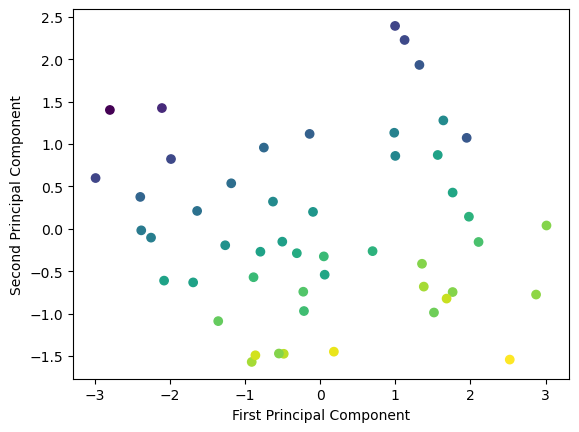

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=colors, cmap='viridis')   
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
